In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import sklearn

In [3]:
#imorting the dataset

data= pd.read_excel("Data_Train.xlsx")
pd.set_option('display.max_columns', None)

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
27h 55m      1
31h 50m      1
13h 35m      1
47h 40m      1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

In [93]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(inplace=True)
data= data.reset_index(drop=True)
data.shape

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Eda

In [11]:
data['Journey_Day']= pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [12]:
data['Journey_Month']= pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [13]:
#Dropping date_of_journey

data= data.drop(['Date_of_Journey'], axis=1)

In [14]:
data['Arrival_hour']= pd.to_datetime(data['Arrival_Time']).dt.hour

In [15]:
data['Arrival_min']= pd.to_datetime(data['Arrival_Time']).dt.minute

In [16]:
data= data.drop('Arrival_Time', axis=1)

In [214]:
#extracting hours and min from duration

#data['Duration_hours']= data['Duration'].str.split(expand=True)[0].str.split('h', expand=True)[0]

In [17]:
# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)


In [21]:
data["Dep_hour"]= data["Dep_hour"].astype('float')

In [22]:
data["Dep_hour"]

0        22.0
1         5.0
2         9.0
3        18.0
4        16.0
         ... 
10677    19.0
10678    20.0
10679     8.0
10680    11.0
10681    10.0
Name: Dep_hour, Length: 10682, dtype: float64

In [23]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int64
Journey_Month        int64
Arrival_hour         int64
Arrival_min          int64
Duration_hours       int64
Duration_mins        int64
Dep_hour           float64
Dep_min              int64
dtype: object

In [258]:
# cat ploting

data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int64
Journey_Month        int64
Arrival_hour         int64
Arrival_min          int64
Duration_hours       int64
Duration_mins        int64
Dep_hour           float64
Dep_min            float64
dtype: object

<Figure size 720x720 with 0 Axes>

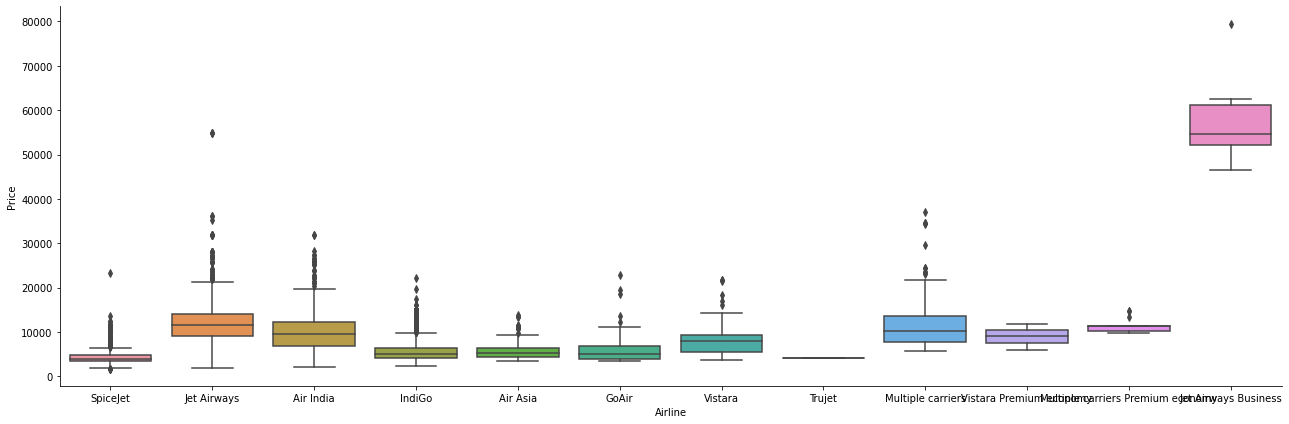

In [259]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sns.catplot(y='Price', x='Airline', data= data.sort_values(by='Price'), height=6, aspect=3, kind='box' )
plt.tight_layout()

In [260]:
#since Airline is nominal data, using onehot encoder
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
airline= data['Airline']

In [27]:
airline= pd.get_dummies(data['Airline'], drop_first=True, prefix='Airline')

In [28]:
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,0,0,0
10678,1,0,0,0,0,0,0,0,0,0,0
10679,0,0,0,1,0,0,0,0,0,0,0
10680,0,0,0,0,0,0,0,0,0,1,0


In [266]:
# source vs price

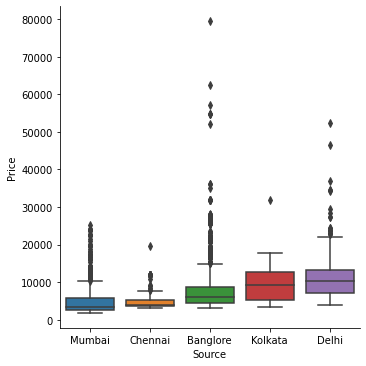

In [267]:
sns.catplot(x='Source', y='Price', data= data.sort_values(by='Price'), kind='box')

In [268]:
data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
source= data['Source']

In [34]:
source= pd.get_dummies(data['Source'], drop_first=True, prefix='Source')

In [35]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [272]:
#destination  vs price

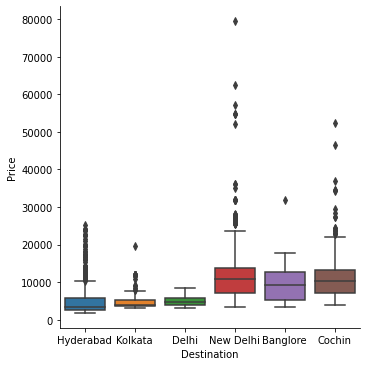

In [273]:
sns.catplot(x='Destination', y='Price', data= data.sort_values(by='Price'), kind='box')

In [274]:
destination= data['Destination']

In [36]:
destination= pd.get_dummies(data['Destination'], drop_first=True, prefix='Destination')

In [37]:
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [277]:
data['Route'].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [278]:
data['Total_Stops'].head()
#since total stops and roue gives the same information we can remove route and convert total stops in to numerical values
#indicating the categories

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: object

In [279]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [280]:
data['Additional_Info'].value_counts(1)*100
#80 percent data is no info, hence removing this

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
2 Long layover                   0.009361
Red-eye flight                   0.009361
1 Short layover                  0.009361
Name: Additional_Info, dtype: float64

In [38]:
data= data.drop(['Additional_Info', 'Route'], axis=1)

In [39]:
data['Total_Stops']= data['Total_Stops'].replace({'1 stop':1, 'non-stop': 0,'2 stops': 2, '3 stops':3, '4 stops': 4})

In [40]:
data= pd.concat([data, airline, source, destination], axis=1)

In [41]:
data= data.drop(["Airline", "Source", "Destination"], axis=1)

In [42]:
data.shape

(10682, 30)

In [287]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Dep_hour,Dep_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,3897,24,3,1,10,2,50,22.0,20.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2.0,7662,1,5,13,15,7,25,5.0,50.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2.0,13882,9,6,4,25,19,0,9.0,25.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,6218,12,5,23,30,5,25,18.0,5.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.0,13302,1,3,21,35,4,45,16.0,50.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [288]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Dep_hour', 'Dep_min',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [43]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [44]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True, prefix='Airline')

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True, prefix='Source')

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True, prefix='Destination')

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [45]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [46]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,2,50,22.0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,7,25,5.0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,19,0,9.0,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,5,25,18.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,4,45,16.0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

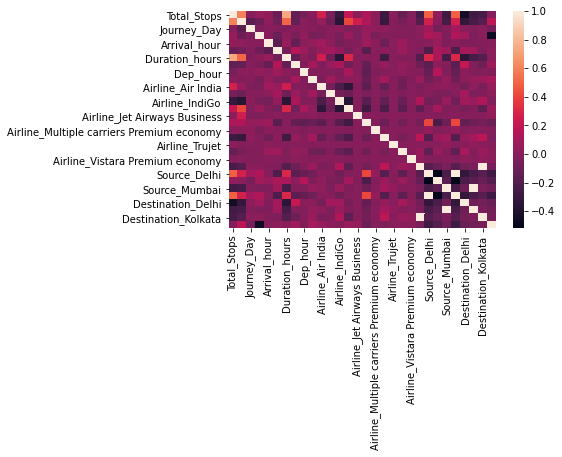

In [47]:
#Feature selection
sns.heatmap(data.corr())

In [48]:
x= data.drop('Price', axis=1)
y= data['Price']

In [50]:
x= x.drop('Airline_Trujet', axis=1)

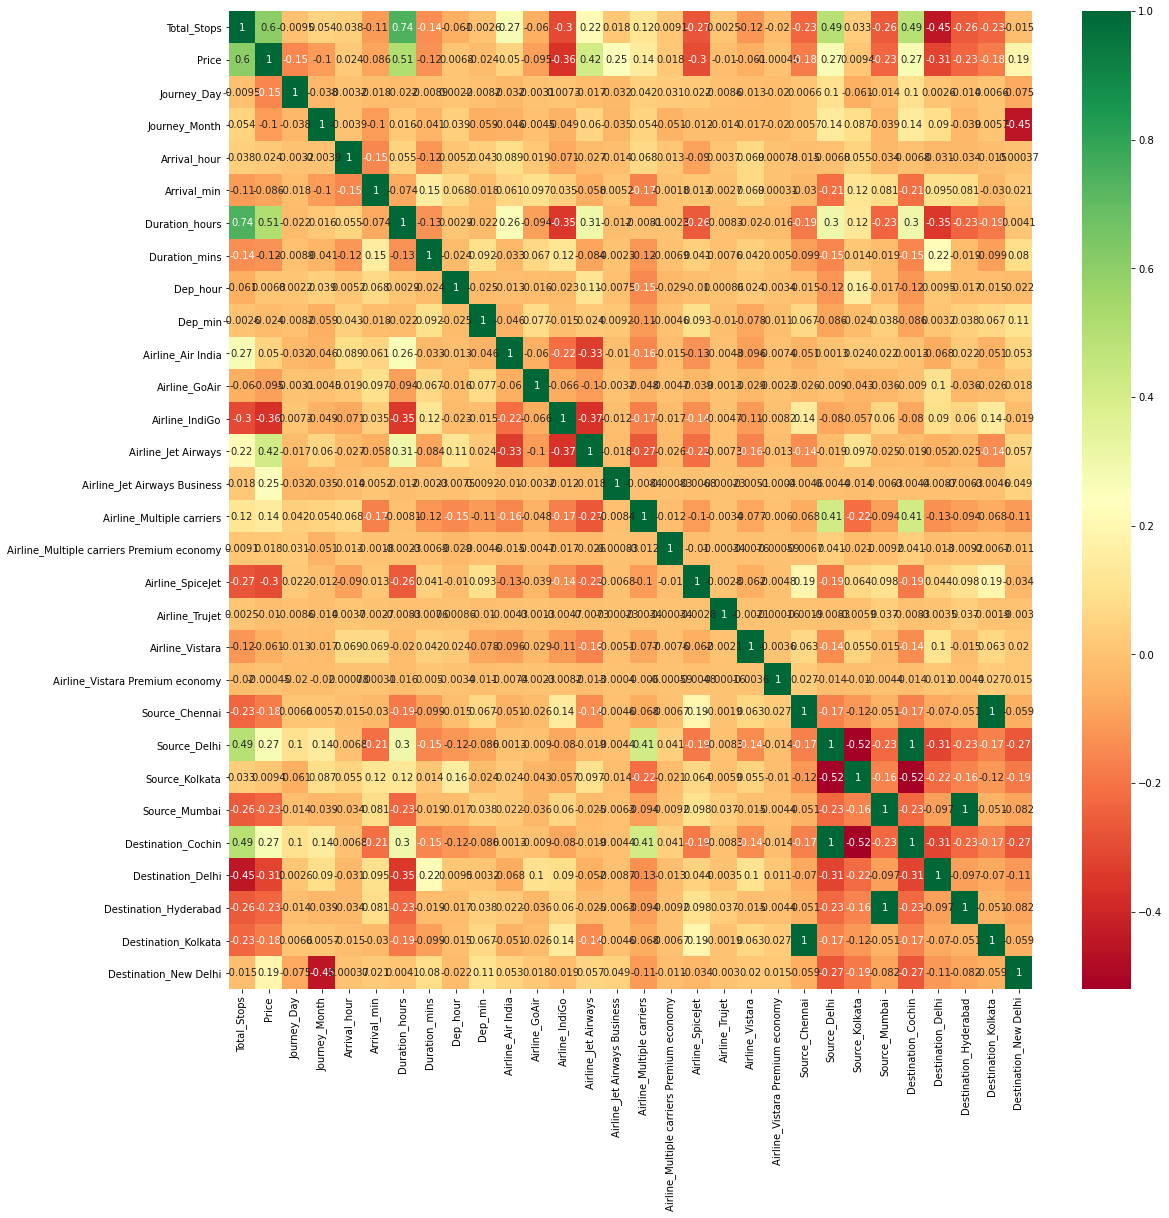

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [54]:
selection.feature_importances_

array([2.48785122e-01, 1.43039823e-01, 5.36794726e-02, 2.81593109e-02,
       1.93483681e-02, 1.05280751e-01, 1.74814851e-02, 2.40933348e-02,
       2.07712635e-02, 1.05834613e-02, 1.67272664e-03, 1.68102527e-02,
       1.35612047e-01, 6.77734962e-02, 1.91397425e-02, 8.66379986e-04,
       2.65199807e-03, 5.30252842e-03, 8.59772605e-05, 4.92749931e-04,
       8.02749472e-03, 3.60429308e-03, 6.41926250e-03, 1.41427681e-02,
       1.45693849e-02, 6.27476541e-03, 4.23611820e-04, 2.49081282e-02])

In [56]:
imp_features= pd.Series(selection.feature_importances_, index=x.columns)
imp_features

Total_Stops                                  0.248785
Journey_Day                                  0.143040
Journey_Month                                0.053679
Arrival_hour                                 0.028159
Arrival_min                                  0.019348
Duration_hours                               0.105281
Duration_mins                                0.017481
Dep_hour                                     0.024093
Dep_min                                      0.020771
Airline_Air India                            0.010583
Airline_GoAir                                0.001673
Airline_IndiGo                               0.016810
Airline_Jet Airways                          0.135612
Airline_Jet Airways Business                 0.067773
Airline_Multiple carriers                    0.019140
Airline_Multiple carriers Premium economy    0.000866
Airline_SpiceJet                             0.002652
Airline_Vistara                              0.005303
Airline_Vistara Premium econ

<AxesSubplot:>

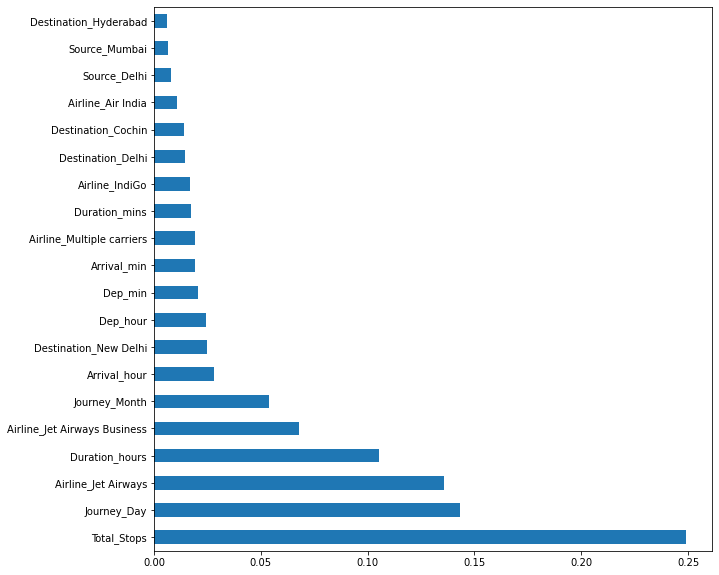

In [59]:
plt.figure(figsize=(10, 10))

imp_features.nlargest(20).plot(kind='barh')

In [ ]:
#Fitting the model


In [60]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=2)

In [61]:
#importing model
from sklearn.ensemble import RandomForestRegressor

reg_rf_initial= RandomForestRegressor()
reg_rf_initial.fit(xtrain, ytrain)

RandomForestRegressor()

In [63]:
reg_rf_initial.score(xtrain, ytrain)

0.9572130771918724

In [64]:
reg_rf_initial.score(xtest, ytest)

0.7981558473786199

In [65]:
ypred= reg_rf_initial.predict(xtest)

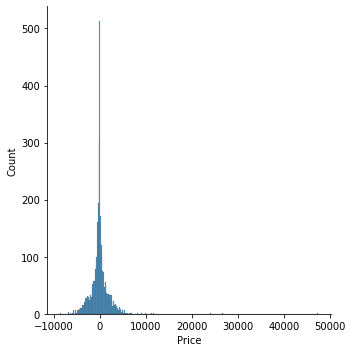

In [67]:
sns.displot(ytest- ypred)

C:\Users\hp\anaconda3\envs\carpred\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

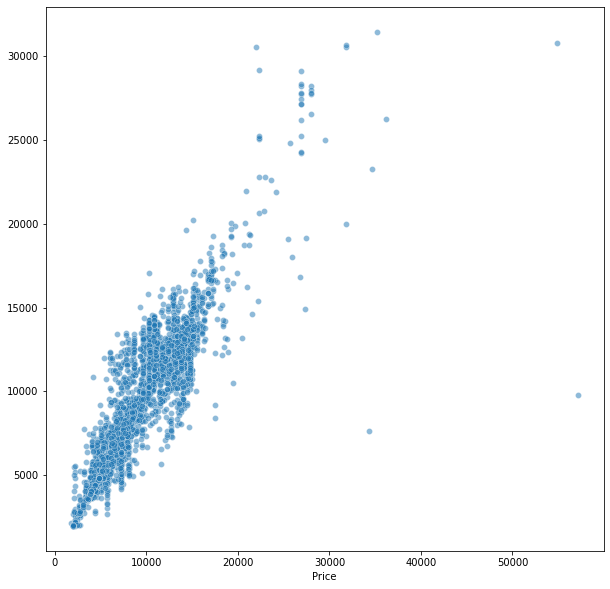

In [70]:
plt.figure(figsize=(10, 10))
sns.scatterplot(ytest, ypred, alpha=0.5)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
param_grid= {'n_estimators': np.arange(100, 1200, 12), 'max_features':['auto', 'sqrt'], 
             'max_depth': np.arange(5, 30, 6), 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf':
            [1,2,5, 10]}

In [77]:
random_search= RandomizedSearchCV(reg_rf_initial, param_distributions=param_grid, 
                                 scoring='neg_mean_squared_error', n_jobs=-1, cv=5)

In [78]:
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 11, 17, 23, 29]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': array([ 100,  112,  124,  136,  148,  160,  172,  184,  196,  208,  220,
        232,  244,  256,  268,  280,  292,  304,  316,  328,  340,  352,
        364,  376,  388,  400,  412,  424,  436,  448,  460,  472,  484,
        496,  508,  520,  532,  544,  556,  568,  580,  592,  604,  616,
        628,  640,  652,  664,  676,  688,  700,  712,  724,  736,  748,
        760,  772,  784,  796,  808,  820,  832,  844,  856,  868,  880,
        892,  904,  916,  928,  940,  952,  964,  976,  988, 1000, 1012,
       1024, 1036, 1048, 1060, 1072, 1084, 1096, 1108,

In [79]:
random_search.best_params_

{'n_estimators': 1144,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 23}

In [81]:
rf_final= RandomForestRegressor(n_estimators= 1144,
 min_samples_split= 2,
 min_samples_leaf =2,
 max_features= 'auto',
 max_depth= 23)

In [82]:
rf_final.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=23, min_samples_leaf=2, n_estimators=1144)

In [83]:
pred_final= rf_final.predict(xtest)

In [84]:
rf_final.score(xtest, ytest)

0.8035881600899315

In [85]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_final, file)

In [89]:
model= open('flight_rf.pkl', 'rb')
forest= pickle.load(model)

In [90]:
forest.predict(xtest)

#price flight fair

array([ 9401.95657763, 19186.0913295 ,  5924.05495716, ...,
       12185.35368949,  5833.51252844,  4893.70785569])

In [92]:
from flask import Flask, request, render_template

In [94]:
len(x.columns)

28